In [1]:
library(gprofiler2)
library(ggplot2)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)

Loading required package: grid
ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



In [2]:
weights_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_weights.csv"
weights = read.csv(weights_filename, row.names = 1)
colnames(weights) = paste0("MOFA",1:20)
head(weights)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HES4,-1.1989501,-0.606049496,-0.57734171,-0.71688760,-0.53329179,0.2955796,0.24943212,0.16363017,0.25442816,-0.15633491,0.08771356,-0.166739590,0.06892244,0.1615256294,-0.1022589954,-0.23343917,-0.050598826,0.07421634,-0.02027675,-0.032060071
CHD5,-1.0323199,0.007728008,-0.13724390,-0.15003112,0.20892100,0.2646135,0.03279889,-0.15273501,0.29409552,-0.06216265,0.12637782,-0.003141197,0.22686901,0.0884313507,0.0860417026,0.11995625,-0.035347734,0.07623051,0.09673210,0.003000383
ACOT7,-1.1731706,-0.559427451,-0.05522287,0.20251814,-0.36598156,0.2965204,-0.03088592,-0.10432686,-0.11528162,-0.22992004,-0.27992944,-0.052675703,-0.04034805,0.0523739851,0.0711498078,0.04845310,0.049514301,-0.08319519,-0.13374392,0.018522163
UTS2,-1.2182314,0.348607595,0.04788651,-0.17659157,0.02053964,-0.4976839,0.46628145,0.03266932,0.01372975,0.50738456,-0.02002021,0.451064910,-0.06107053,0.1862427955,0.1649189463,0.27944837,0.076698026,-0.07084088,-0.01014295,0.192439844
ENO1,-1.0558830,0.258638612,-0.10643891,0.01003899,-0.28350979,0.1349899,-0.01722538,-0.04640726,-0.03483620,-0.24687520,-0.18486048,0.128132962,-0.09510169,-0.0545545261,-0.0007439852,-0.06284875,0.003176325,0.09219709,-0.21268319,-0.115481766
SRM,-0.5414874,-0.492902748,-0.87243656,-0.22825178,-0.76522899,-0.1681531,-0.49203327,0.10414095,0.21825586,0.11083616,0.18738947,-0.168366072,-0.38068892,0.0009024366,0.1230244657,-0.07822947,0.375346126,0.06126986,-0.13921175,0.023691497


In [3]:
genes_3 = weights[,3]
names(genes_3) = rownames(weights)
genes = names(genes_3[order(genes_3, decreasing = T)])
head(genes,30)

[1] "RPRM"      "NSG2"      "FOS"       "CGA"       "HMGCS1"    "GPM6A"    
 [7] "MSMO1"     "INSIG1"    "TMEM35"    "DIRAS3"    "NAP1L3"    "LINC00632"
[13] "PKIA"      "CCK"       "CLK1"      "RAB3C"     "BEX5"      "TTR"      
[19] "IDI1"      "GLRA2"     "HMGB2"     "TMSB15A"   "ADCYAP1"   "PCSK1"    
[25] "GNG2"      "BLCAP"     "PREPL"     "LMO3"      "SNCA"      "DNER"

In [4]:
weights = weights[,1:10]

In [13]:
weights_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/pca_from_geneticeffects_loadings.csv"
weights = read.csv(weights_filename, row.names = 1)
head(weights)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213
ABHD10_.3_111697439_T_G,0.10288235,-0.03029193,0.10110367,-0.01550177,0.044579328,-0.036184340,0.25291167,-0.021818303,0.180205158,-0.127087734,...,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000
ABHD12B_.14_51328222_C_T,-0.02291588,0.07088373,-0.01279243,-0.03338384,0.022477566,-0.064067103,0.07050307,-0.095241767,-0.107349287,0.008540578,...,0.002371498,-0.025986403,0.01419905,-0.001996651,-0.017163338,0.008652013,0.003295289,0.0094445510,-0.001916178,-0.007669899
ACKR2_.3_42817129_C_T,-0.02937964,-0.01448766,-0.04988377,0.01674497,-0.002425234,0.027625450,0.01250888,0.005124386,-0.009498452,0.060501979,...,-0.015782088,-0.191569654,0.26859954,-0.009259665,0.083119532,-0.018697418,0.008192609,0.0121483003,-0.007707389,-0.043532687
ADD2_.2_70894426_A_T,-0.02432310,0.05039080,0.01408933,-0.01368305,-0.013392908,-0.003902099,0.02234229,-0.037882457,-0.035400995,-0.028490100,...,-0.051634865,-0.020117308,0.08726943,0.013690266,0.049600843,0.027686176,0.016712472,-0.0001481214,0.010071425,-0.012386114
ADSL_.22_40757228_A_C,0.03270395,-0.05249378,0.07061207,-0.09750721,0.070727387,-0.035486045,0.02634234,0.131450668,-0.151527600,-0.098347828,...,0.040573214,-0.004744631,0.02958909,0.016182752,-0.002550616,-0.006451463,0.014198673,-0.0146883849,-0.018862308,-0.022452396
AIM1L_.1_26673825_C_T,0.01599162,-0.02125504,0.02096633,0.02710308,0.010821071,-0.018131726,-0.01222587,0.016839665,0.025125370,-0.011504171,...,-0.571588153,-0.014718224,0.01197050,0.588580539,-0.006778254,0.006187920,-0.016368314,0.1117532562,-0.286104732,-0.001483808


In [14]:
weights = weights[,1:10]

In [15]:
df_list = list()
for (i in 1:ncol(weights)){
    gene_list = weights[,i]
    names(gene_list) = rownames(weights)
    # order
    genes = gene_list[order(gene_list, decreasing = T)]
    # get gene names only
    genes = gsub("_.*","",names(genes)) ### eQTL (PCA from genetic effects)
#     genes = gsub(".*_","",names(genes)) ### genes (MOFA from expression)
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [16]:
head(genes)

[1] "OCLN"      "KNOP1"     "GALNT10"   "MYO5B"     "PRPH"      "RBM26.AS1"

In [17]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05,]
#     print(nrow(df_curr))
    n = min(30, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}

In [18]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    factor = paste0("MOFA",(i))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$factor = factor
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","factor","term_name","term_id")])
}

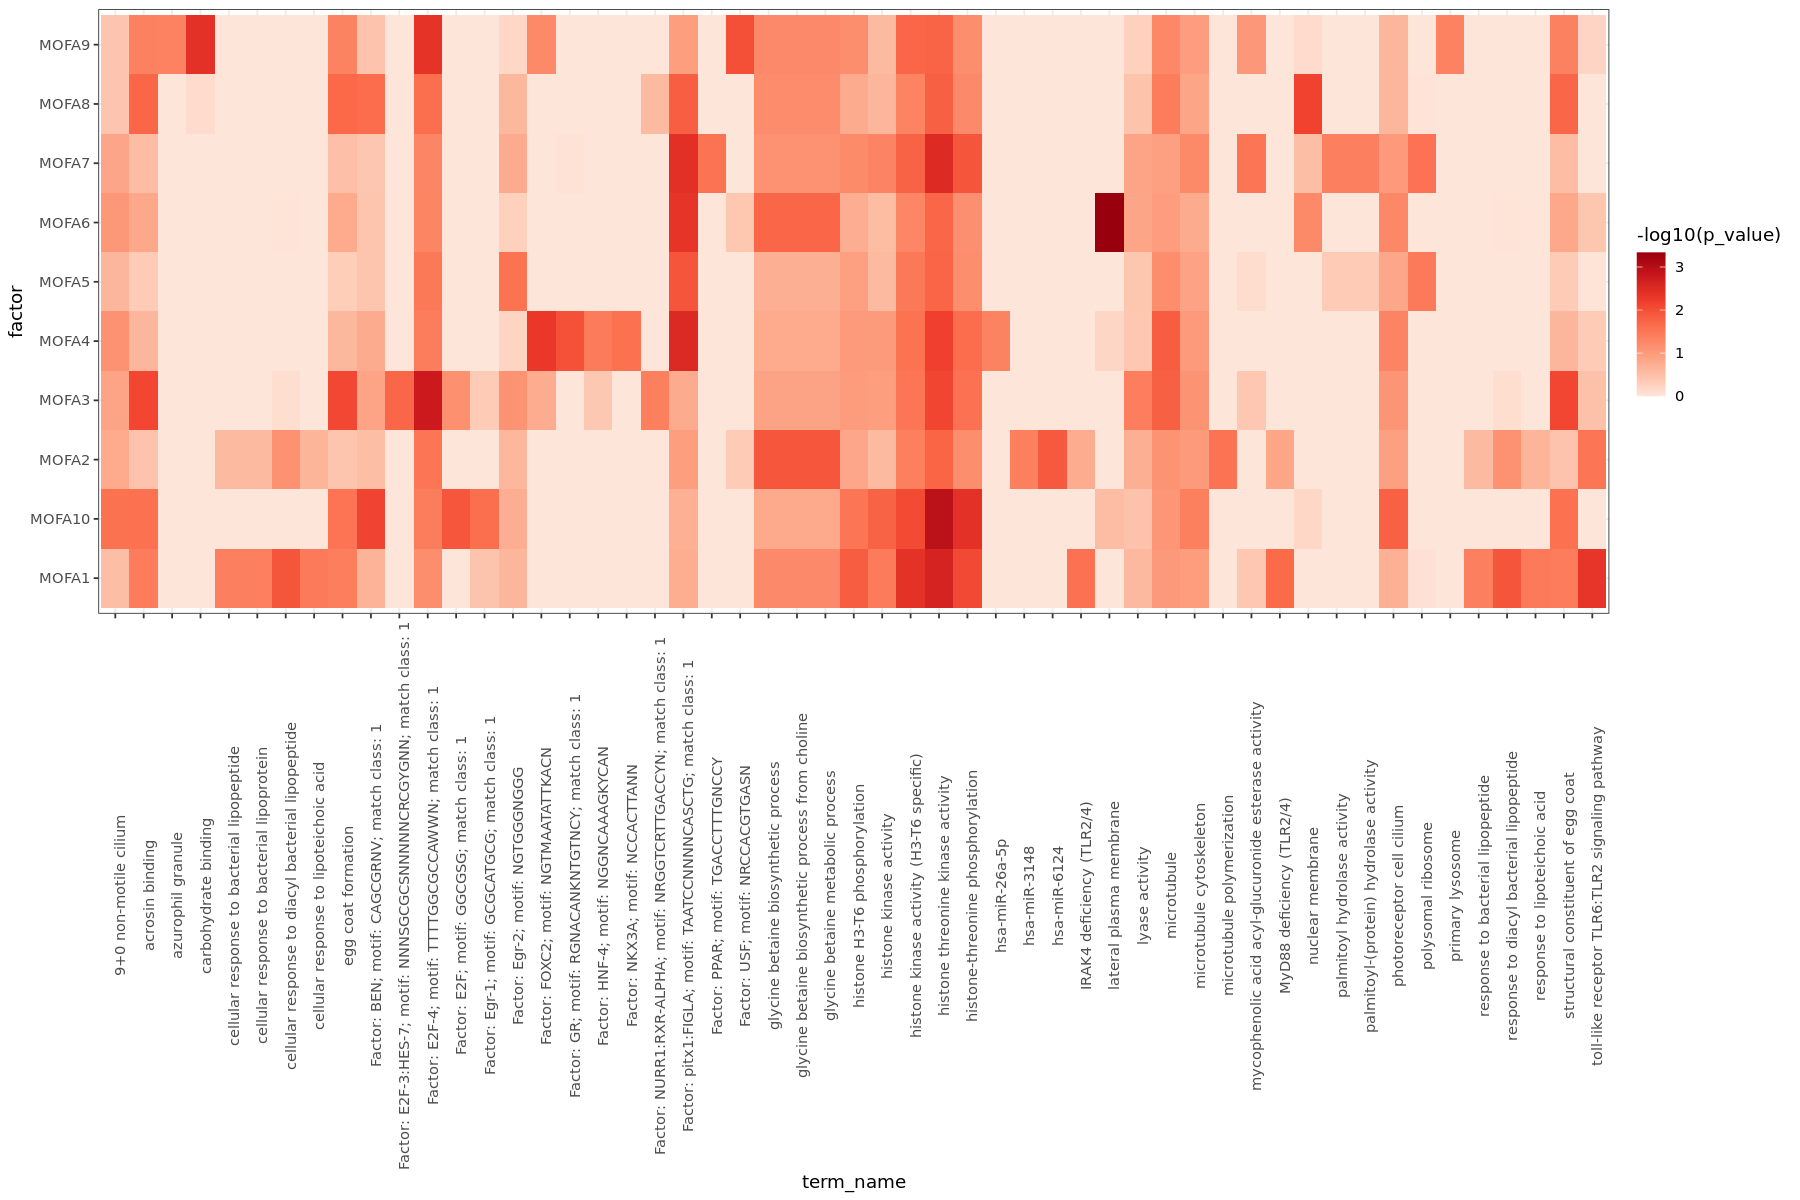

In [19]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=factor, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [20]:
mat = matrix(0, nrow=length(unique(df_to_plot$factor)), ncol=length(unique(df_to_plot$term_name)))
for (i in 1:nrow(mat)){
    factor = unique(df_to_plot$factor)[i]
    for (j in 1:ncol(mat)){
        term = unique(df_to_plot$term_name)[j]
#         print(term)
        if (length(df_to_plot[df_to_plot$factor == factor & df_to_plot$term_name == term,"p_value"]) == 0){next}
        mat[i,j] = min(df_to_plot[df_to_plot$factor == factor & df_to_plot$term_name == term,"p_value"])
    }
}
rownames(mat) = unique(df_to_plot$factor)
colnames(mat) = unique(df_to_plot$term_name)

In [21]:
mat0 = -log10(mat)
mat0[mat0==Inf] = -1

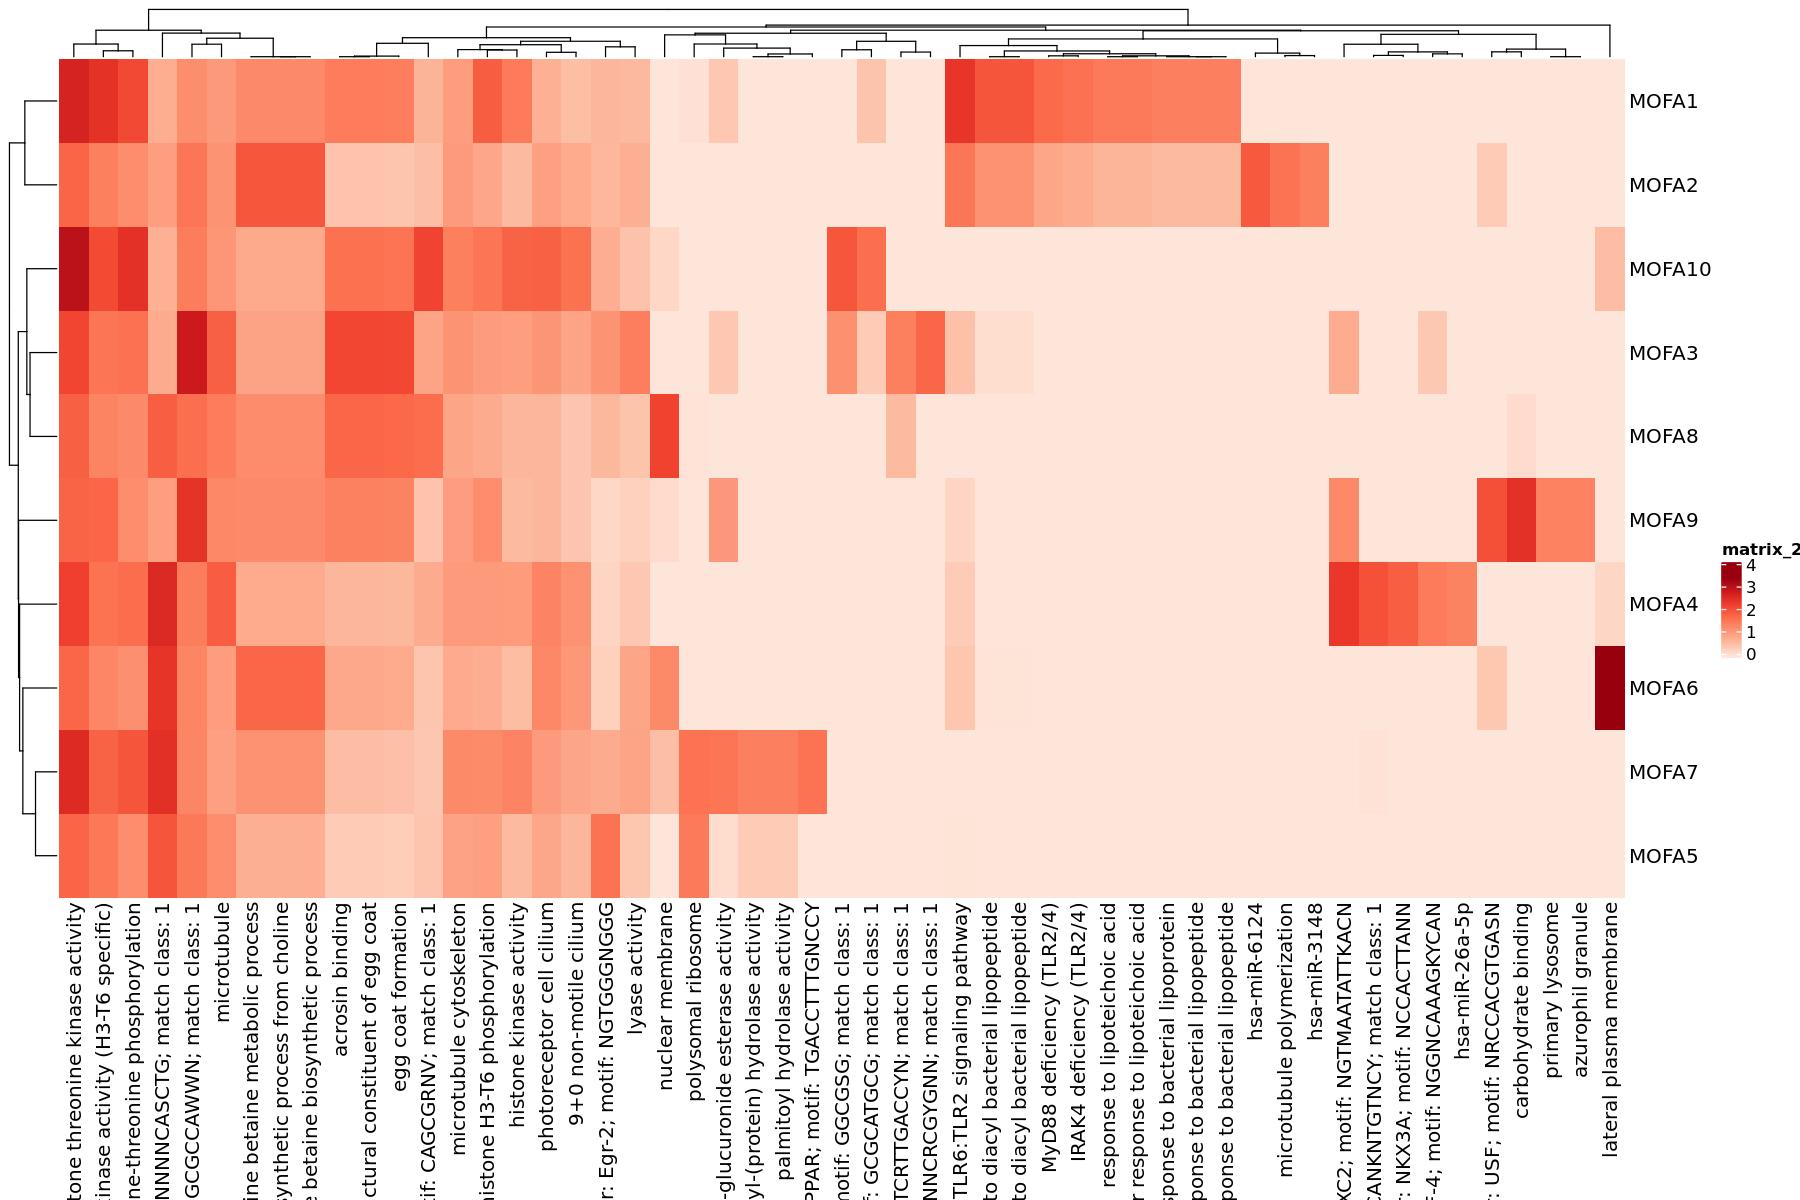

In [22]:
### GxC MOFAs
options(repr.plot.width = 15, repr.plot.height = 10)
Heatmap(mat0, col = brewer.pal(7,"Reds"))

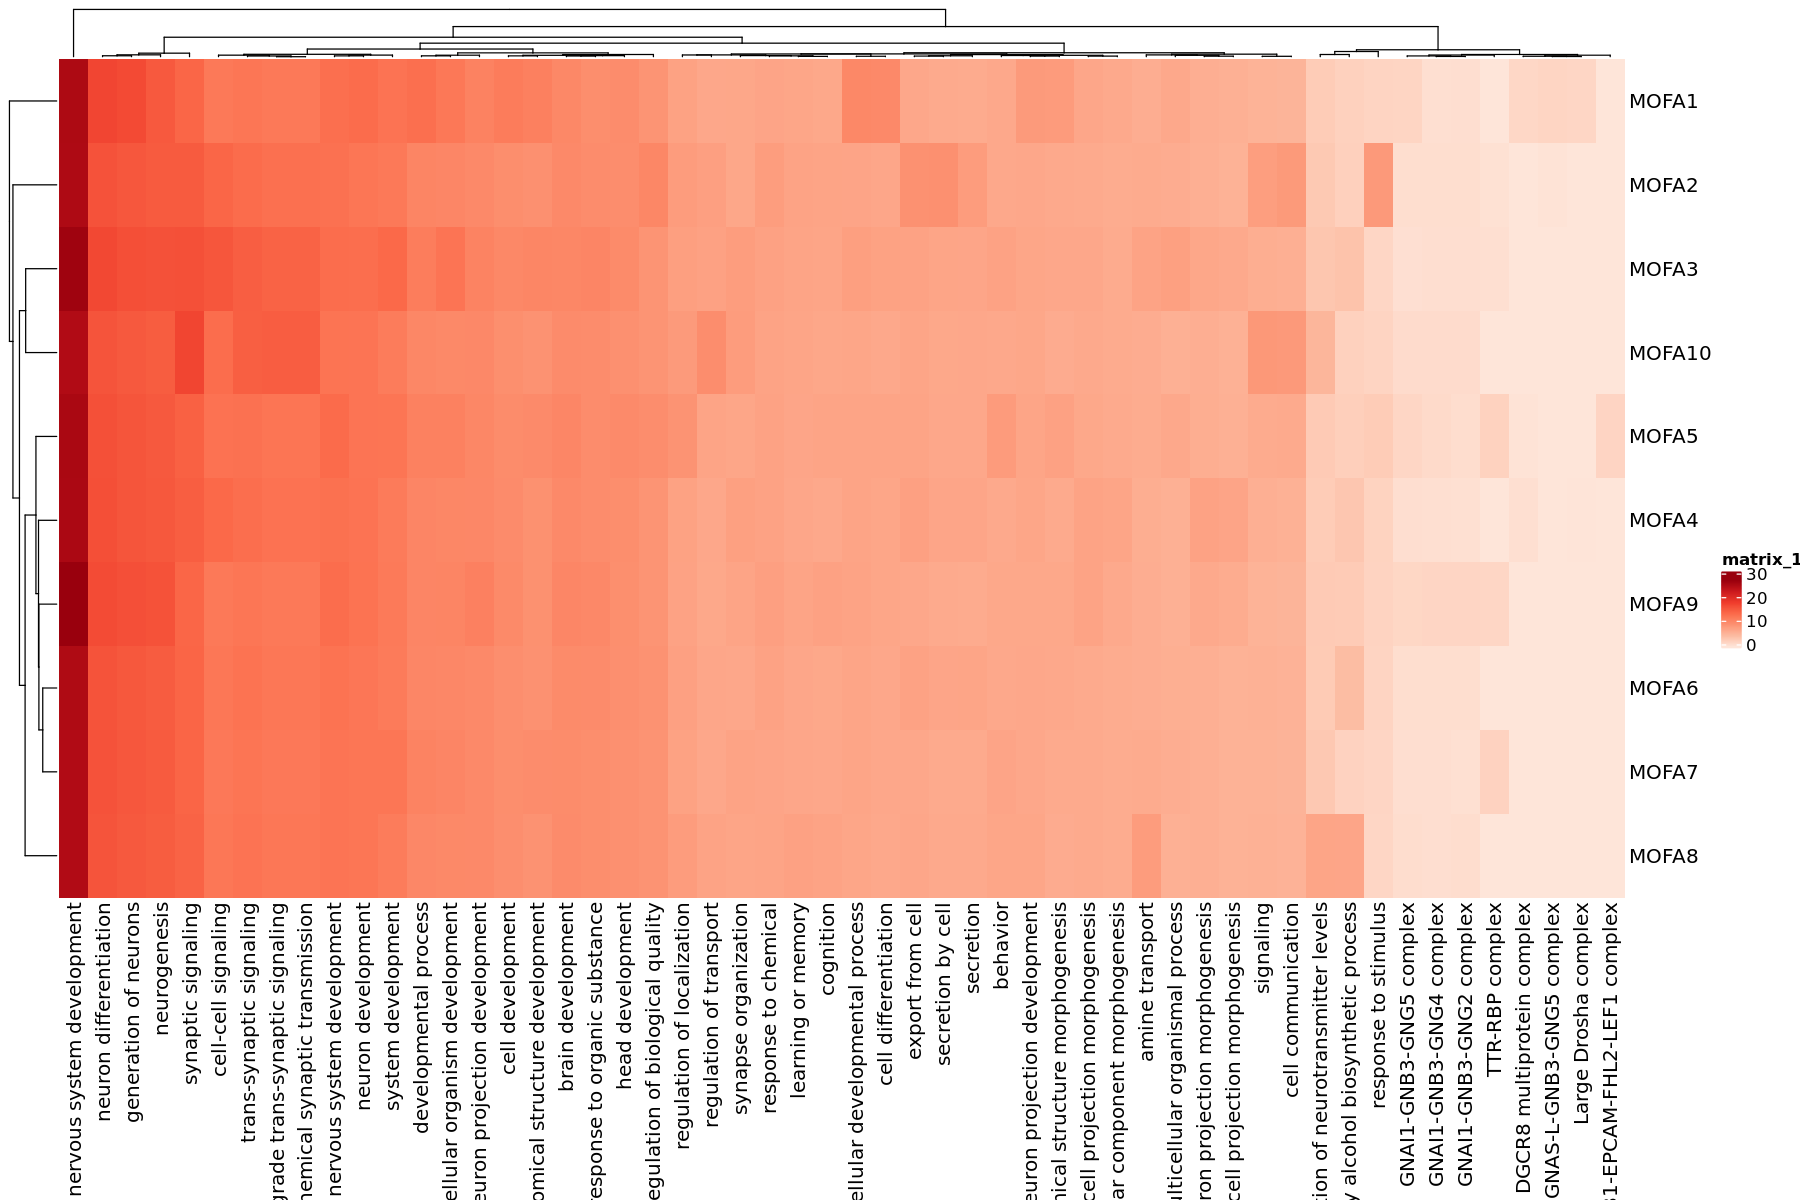

In [12]:
### expression MOFAs
options(repr.plot.width = 15, repr.plot.height = 10)
Heatmap(mat0, col = brewer.pal(7,"Reds"))